In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

from ogb.nodeproppred import PygNodePropPredDataset
from tqdm import tqdm

In [2]:
dataset = PygNodePropPredDataset(name='ogbn-products', root='../data') 

split_idx = dataset.get_idx_split()
train_idx, valid_idx, test_idx = split_idx["train"], split_idx["valid"], split_idx["test"]
graph = dataset[0]

edge_index = graph._store['edge_index']
embeddings = graph._store['x']
targets = graph._store['y']

In [8]:
embeddings[train_idx].shape

torch.Size([196615, 100])

### Граф

In [5]:
classes = torch.unique(targets)
num_vertices = embeddings.shape[0]

print(f'Number of vertices: {num_vertices} with embeddings dimensionality: {embeddings.shape[1]}')
print(f'Number of edges: {edge_index.shape[1]}')
print(f'Number of classes: {len(classes)}')

Number of vertices: 2449029 with embeddings dimensionality: 100
Number of edges: 123718280
Number of classes: 47


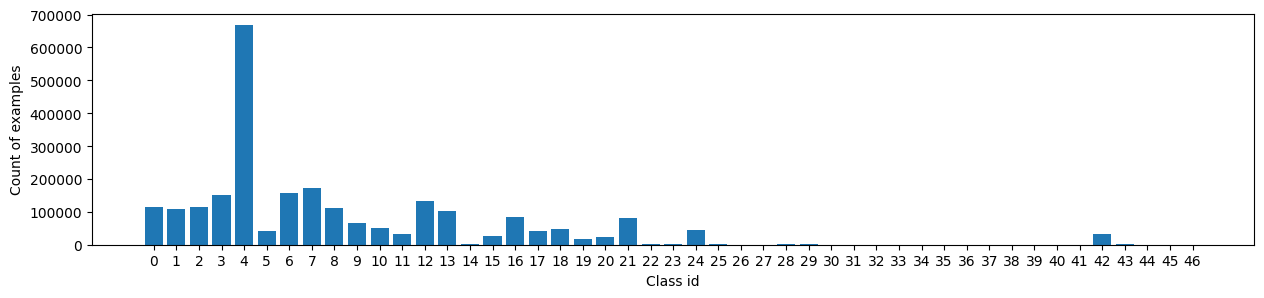

In [7]:
plt.figure(figsize=(15, 3))
plt.bar(*np.unique(targets, return_counts=True));
plt.xticks(classes)
plt.xlabel('Class id')
plt.ylabel('Count of examples')
plt.show()